In [5]:
import tensorflow as tf
import numpy as np  
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical



In [6]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [7]:
# Define constants
IMAGE_SIZE = (299, 299)
BATCH_SIZE = 32
EPOCHS = 10  # Specify the number of epochs

In [8]:
# Data paths
train_data_dir = "E:/Chest X-Ray (Pneumonia,Covid19,Tuberculosis)/train"
test_data_dir = "E:/Chest X-Ray (Pneumonia,Covid19,Tuberculosis)/test"

In [9]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [10]:
# Load InceptionV3 base model (pre-trained on ImageNet)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))


In [11]:
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [12]:
# Create a new model on top of InceptionV3 with additional CNN layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)  # Adjust the number of units for the number of classes

model = Model(inputs=base_model.input, outputs=predictions)

In [13]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 6326 images belonging to 4 classes.


In [19]:
# Load test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 771 images belonging to 4 classes.


In [20]:
# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)

Epoch 1/10


198/198 [==============================] - 1087s 5s/step - loss: 0.3473 - accuracy: 0.8710 - val_loss: 0.4357 - val_accuracy: 0.8262
Epoch 2/10
198/198 [==============================] - 674s 3s/step - loss: 0.1921 - accuracy: 0.9295 - val_loss: 0.4854 - val_accuracy: 0.8236
Epoch 3/10
198/198 [==============================] - 645s 3s/step - loss: 0.1688 - accuracy: 0.9379 - val_loss: 0.4279 - val_accuracy: 0.8495
Epoch 4/10
198/198 [==============================] - 643s 3s/step - loss: 0.1521 - accuracy: 0.9456 - val_loss: 0.3512 - val_accuracy: 0.8677
Epoch 5/10
198/198 [==============================] - 646s 3s/step - loss: 0.1470 - accuracy: 0.9459 - val_loss: 0.4119 - val_accuracy: 0.8444
Epoch 6/10
198/198 [==============================] - 767s 4s/step - loss: 0.1230 - accuracy: 0.9538 - val_loss: 0.5068 - val_accuracy: 0.8418
Epoch 7/10
198/198 [==============================] - 662s 3s/step - loss: 0.1315 - accuracy: 0.9537 - val_loss: 0.4540 - val_accuracy: 0.8

In [21]:
# Save the trained model
model.save('lung_disease_prediction_model.h5')

C:\Users\rsanc\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input


In [23]:

# Load the trained model
loaded_model = load_model('lung_disease_prediction_model.h5')

In [41]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Load the trained model
model = load_model('lung_disease_prediction_model.h5')  # Replace with the actual path to your saved model

# Path to the image you want to predict
img_path = "E:\Chest X-Ray (Pneumonia,Covid19,Tuberculosis)\pnemonia_virus_6.jpeg"

# Read and resize the image
img = cv2.imread(img_path)
img = cv2.resize(img, (299, 299))  # Resize to match the model's input size

# Expand dimensions to create a batch size of 1
x = np.expand_dims(img, axis=0)

# Preprocess the input image
x = preprocess_input(x)

# Make predictions using the loaded model
result = model.predict(x)

# Print the predicted probabilities
print("Predicted probabilities:", (result * 100).astype('int'))


1/1 [==============================] - 3s 3s/step
Predicted probabilities: [[ 0  0 99  0]]


In [45]:
import pandas as pd
import matplotlib.pyplot as plt


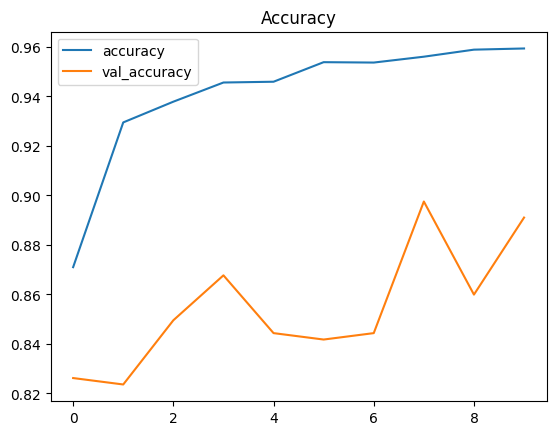

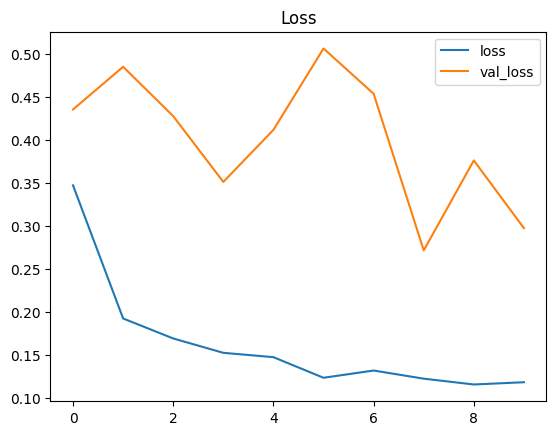

In [46]:
pd.DataFrame(history.history) [['accuracy', 'val_accuracy']].plot() 
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history) [['loss', 'val_loss']].plot() 
plt.title("Loss") 
plt.show()